Importing the Three Amigos.

In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("blog_archive/blogtext.csv")

In [3]:
column_names = df.columns.tolist()
column_names

['id', 'gender', 'age', 'topic', 'sign', 'date', 'text']

Some investigation before starting this notebook indicates that not all topics will be suitable for the purpose of Void right now. The following gives us a breakdwon of candidates.

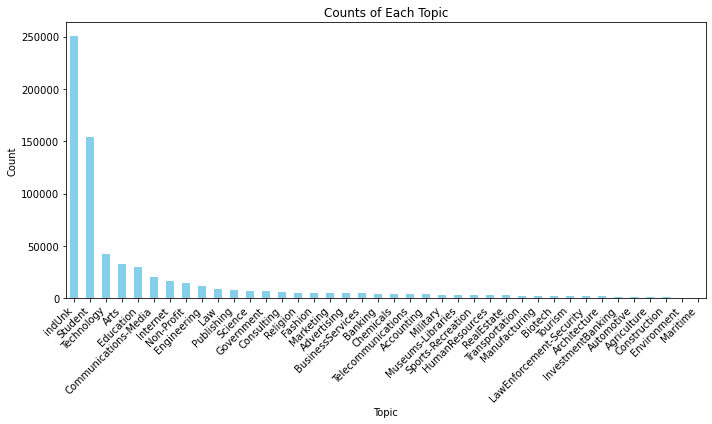

In [4]:
topic_counts = df['topic'].value_counts()

plt.figure(figsize=(10, 6))
topic_counts.plot(kind='bar', color='skyblue')
plt.title("Counts of Each Topic")
plt.xlabel("Topic")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

indUnk is probably the term used by the dataset for "unclassified" or "miscellaneous," but we can check by running this function a few times and seeing if there are any commonalities.

In [5]:
def get_random_rows_by_topic(topic):
    filtered_df = df[df['topic'] == topic]
    
    if len(filtered_df) == 0:
        return f"No rows found with topic {topic}"
    
    random_rows = filtered_df.sample(n=1)
    return random_rows['text'].values[0]

In [6]:
topic = "indUnk"
random_rows_df = get_random_rows_by_topic(topic)
print(random_rows_df)

            urlLink [ digitalrex ]  a new division setup by sega lead by former leader of am2 division at sega, yu suzuki.  urlLink shenmue.com  has also recently seen a redesign. And in other sega/shenmue news shenmuedojo's recent reports show that shenmue three is on hold for quite some while really not even in development, could it die? lets hope not and wish suzuki-san and crew good luck!         


And just for reference, we should get an idea of what some of the other topics end up looking like.

In [7]:
topic = "Chemicals"
random_rows_df = get_random_rows_by_topic(topic)
print(random_rows_df)

       grabic durin thiassi The New York Knicks, Phoenix Suns and Los Angeles Clippers, among others were mentioned as possibilities as Bryant's next address, but he sided with loyalty - as well as a 137-or-so million contract over seven years - when he announced Thursday he's be staying with the Lakers. This announcement came a day after the Lakers shipped O'Neal to the Miami Heat for forwards Lamar Odom, Caron Butler and Brian Grant and a future draft pick. The Texan moved from sixth to second in the overall standings following a ride in which he was runner- stage Ivan Basso of Italy. soltadora9indosta`nico03male`fica,travesi`a radicosa.          


Going through a number of these, the nature and mechanism of the classification of posts into topics is unclear. For instance, it isn't obvious to me why any posts I have found so far would be put into the topic "Chemicals." I briefly considered that it was because the dataset was so old, platforms of the time might have been trying to do their own classification, and *that* tech just had its own problems.

Now that I'm thinking about it, I don't actually know when most of these posts are from.

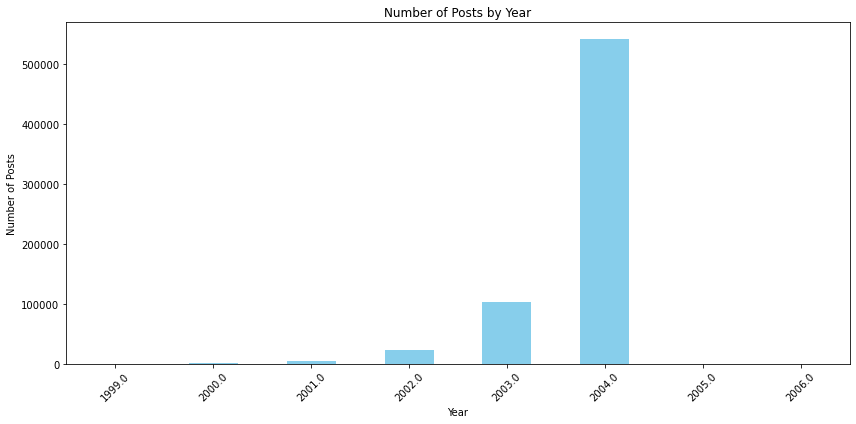

In [8]:
date_df = df
date_df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = date_df['date'].dt.year
df = df.dropna(subset=['year'])
year_counts = df['year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
year_counts.plot(kind='bar', color='skyblue')
plt.title("Number of Posts by Year")
plt.xlabel("Year")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Still, being that there are many thousands of posts here, I want to narrow the scope in case there is some broader trend that I won't be picking up on manually.

In [9]:
included_topics = ["indUnk", "Student", "Technology", "Arts", "Education"]
filtered_df = df[df['topic'].isin(included_topics)]

In [10]:
print(df)

             id gender  age              topic      sign       date   
0       2059027   male   15            Student       Leo 2004-05-14  \
1       2059027   male   15            Student       Leo 2004-05-13   
2       2059027   male   15            Student       Leo 2004-05-12   
3       2059027   male   15            Student       Leo 2004-05-12   
4       3581210   male   33  InvestmentBanking  Aquarius 2004-06-11   
...         ...    ...  ...                ...       ...        ...   
681279  1713845   male   23            Student    Taurus 2004-07-01   
681280  1713845   male   23            Student    Taurus 2004-07-01   
681281  1713845   male   23            Student    Taurus 2004-07-01   
681282  1713845   male   23            Student    Taurus 2004-07-01   
681283  1713845   male   23            Student    Taurus 2004-07-01   

                                                     text    year  
0                  Info has been found (+/- 100 pages,...  2004.0  
1          

In [11]:
print(filtered_df)

             id  gender  age    topic    sign       date   
0       2059027    male   15  Student     Leo 2004-05-14  \
1       2059027    male   15  Student     Leo 2004-05-13   
2       2059027    male   15  Student     Leo 2004-05-12   
3       2059027    male   15  Student     Leo 2004-05-12   
74      3539003  female   14   indUnk   Aries 2004-06-07   
...         ...     ...  ...      ...     ...        ...   
681279  1713845    male   23  Student  Taurus 2004-07-01   
681280  1713845    male   23  Student  Taurus 2004-07-01   
681281  1713845    male   23  Student  Taurus 2004-07-01   
681282  1713845    male   23  Student  Taurus 2004-07-01   
681283  1713845    male   23  Student  Taurus 2004-07-01   

                                                     text    year  
0                  Info has been found (+/- 100 pages,...  2004.0  
1                  These are the team members:   Drewe...  2004.0  
2                  In het kader van kernfusie op aarde...  2004.0  
3      

So we dropped about 170K rows. Our use of this dataset in Void needs users who have a lot of entries. We should be looking at users who have a lot of entries, especially if those take place over an extended period of time.

In [12]:
id_counts = filtered_df['id'].value_counts()
top_100 = id_counts.head(100)
print(top_100)

id
449628     4221
734562     2301
589736     2294
1975546    2261
1107146    2237
           ... 
2973911     578
1679249     570
664485      566
505174      563
642604      561
Name: count, Length: 100, dtype: int64


These were admittedly many more than I was expecting. Let's probe a little.

In [13]:
def plot_id_over_time(id_value, df):
    df = df[df['id'] == id_value]
    # Convert the date column to datetime format
    df['date'] = pd.to_datetime(df['date'])
    
    # Drop rows where date is NaT
    df = df.dropna(subset=['date'])
    
    df['year_month'] = filtered_df['date'].dt.to_period('M')
    
    month_counts = df['year_month'].value_counts().sort_index()
    
    plt.figure(figsize=(12,6))
    month_counts.plot(kind='bar', color='skyblue')
    plt.title(f"Distribution of ID {id_value} Over Time")
    plt.xlabel("Year-Month")
    plt.ylabel("Number of Entries")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [14]:
user_id = 449628

/tmp/ipykernel_8325/944224659.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


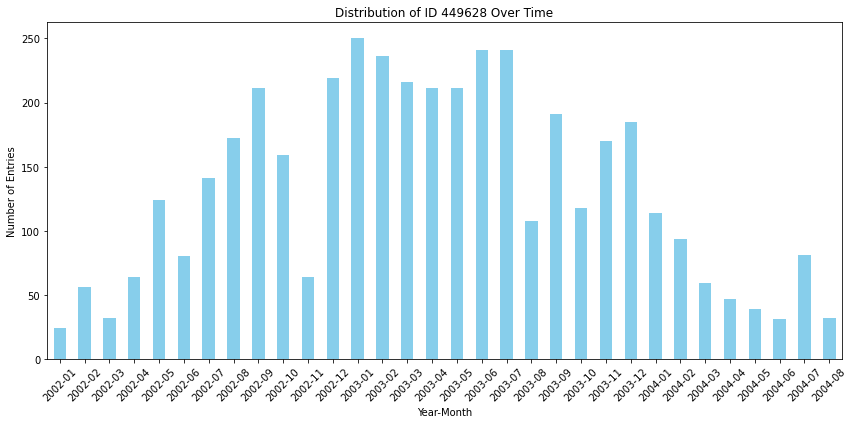

In [15]:
plot_id_over_time(user_id, filtered_df)

I'm wondering about how legitimate this is now. A lot of these months have over 200 posts, and almost all of them over 50.

In [16]:
def get_random_post_by_id(id_value, df):
    df = df[df['id'] == id_value]
    random_post = df.sample(n=1)
    #return random_post['text'].values[0]
    return random_post, random_post['text'].values[0]

In [17]:
row, text = get_random_post_by_id(user_id, filtered_df)
print(row)
print(text)

            id gender  age   topic   sign       date   
239448  449628   male   34  indUnk  Aries 2003-06-26  \

                                                     text    year  
239448                Bad Joke Alert!   via email from...  2003.0  
              Bad Joke Alert!   via email from Laura, of all people!   Three elderly ladies are excited about seeing their first baseball game. They smuggle a bottle of Jack Daniel's into the ball park.  The game is really exciting and they are enjoying themselves immensely mixing the Jack Daniel's with soft drinks.  Soon they realize that the bottle is almost gone and the game has a lot of innings to go.     Based on the given information, what inning is it and how many players are on base?           It's the bottom of the fifth and the bags are loaded........          


In [18]:
def get_sequential_posts_by_id(id_value, df):
    if 'id' not in df.columns or 'date' not in df.columns or 'text' not in df.columns:
        raise ValueError("Required columns are not present in the DataFrame.")
    
    filtered_df = df[df['id'] == id_value]
    
    if len(filtered_df) < 5:
        return f"Fewer than five posts found with ID '{id_value}'."
    
    filtered_df['date'] = pd.to_datetime(filtered_df['date'], errors='coerce')
    filtered_df = filtered_df.dropna(subset=['date'])
    sorted_df = filtered_df.sort_values(by='date')
    sequential_posts = sorted_df.head(5)
    
    return sequential_posts[['date', 'text']].reset_index(drop=True)

In [19]:
row = get_sequential_posts_by_id(user_id, filtered_df)
print(row.iloc[3].text)

              Ideas for the Family Website   I've been gathering ideas to include on our family's website.  I plan to include some information about our daughter, Keisha, who is hard of hearing.  This search has led me to some interesting sites, such as the following:    urlLink Phonak MicroLink MLx FM System , which we recently obtained;    urlLink Audiology Department, Children's Hospital Medical Center, Cincinnati, Ohio , where we obtained her hearing aids and FM system;    urlLink Children's Medical Center, Dayton, Ohio , where Keisha's current audiologist/speech therapist is located;    urlLink Community Services for the Deaf  in Dayton, Ohio    urlLink OtiKids  Web Site, from Oticon, who made Keisha's hearing aids   OK.  So that's it for now. Later.   Update:  Some other things to include on our family's website include   family pictures   'About' pages for Dan, Jennie, and Keisha   family mission statement   enhanced guestbook with additional fields, etc. (such as, how in the Wo

/tmp/ipykernel_8325/1094032171.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date'] = pd.to_datetime(filtered_df['date'], errors='coerce')


In [28]:
def write_posts_to_txt(user_id, df):
    output_file = f"posts/{user_id}_posts.txt"
    filtered_df = df[df['id'] == user_id]
    
    filtered_df.loc[:, 'date'] = pd.to_datetime(filtered_df['date'])
    filtered_df = filtered_df.dropna(subset=['date'])
    sorted_df = filtered_df.sort_values(by='date')
    
    # Write to file
    with open(output_file, 'w') as file:
        for _, row in sorted_df.iterrows():
            file.write(f"{row['date']}.date()\n")
            file.write(f"{row['text']}\n\n")
    
    return f"Posts successfully written to '{output_file}'."

In [29]:
write_posts_to_txt(user_id, filtered_df)

"Posts successfully written to 'posts/449628_posts.txt'."

In [47]:
top_100 = top_100.reset_index()
top_100.columns = ['id', 'counts']
print(top_100)

         id  counts
0    449628    4221
1    734562    2301
2    589736    2294
3   1975546    2261
4   1107146    2237
..      ...     ...
95  2973911     578
96  1679249     570
97   664485     566
98   505174     563
99   642604     561

[100 rows x 2 columns]


In [57]:
for i in top_100['id']:
    write_posts_to_txt(i, filtered_df)